Use `wdwarfdate` to derive white dwarf ages 
====================================

In this tutorial we are going to estimate the ages of two white dwarfs using `wdwarfdate`. We are going to start by importing all the packages we are going to need

In [1]:
import wdwarfdate 
import numpy as np
import time

We are going to set up the white dwarfs's effective temperatures and surface gravity obtained from Cummings,J.D. et al. 2018.

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using `wdwarfdate` and record the time it takes to run. We are going to explicitly indicate the models we want to use:

1) `model_wd = 'DA'`, to indicate we want to use the thick outermost hydrogen layer model. This could be non-DA to use the thin layer model.

2) `model_ifmr = 'Cummings_2018_MIST'`, for the initial-to-final mass relation.

3) `feh = 'p0.00'` and `vvcrit='0.0'`, for the isochrone of the progenitor star.

These are the default models so we do not need to do it in this case, but we will write them down to be clear. For a list of the models that can be used with `wdwarfdate`, go the page Models included in the documentation.
The rest of the parameters we are going to specify:

1) `high_perc = 84, low_perc = 16`: high and low percentiles we want to use to calculate the errors for each parameter. 

2) `data_type = 'Gyr'`: units of the resulting ages. This can be yr, Gyr or log. 

3) `save_plots = False`: With this parameter we decide to not save the resulting plots. 

4) `display_plots=True`: With this parameter we decide to display the resulting plots in jupyter notebook.

Running Teff = 19250 +/- 500 K, logg = 8.16 +/- 0.08
Grid limits used to evaluate the posterior: mi = 0.95-3.98 Msun, log10_tcool = 7.71-8.31


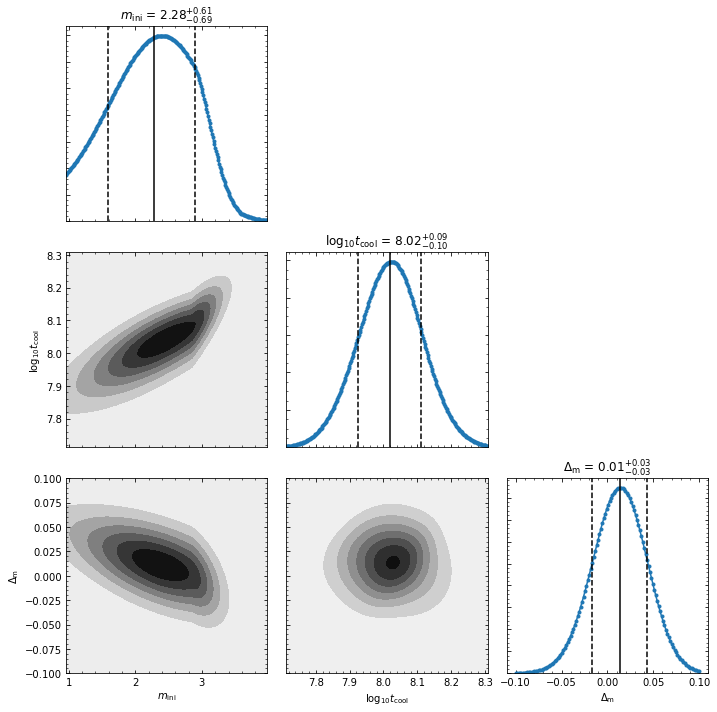

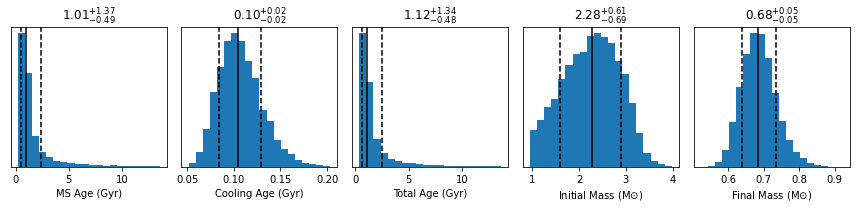

Running Teff = 20250 +/- 850 K, logg = 8.53 +/- 0.13
Grid limits used to evaluate the posterior: mi = 1.92-6.66 Msun, log10_tcool = 7.86-8.67


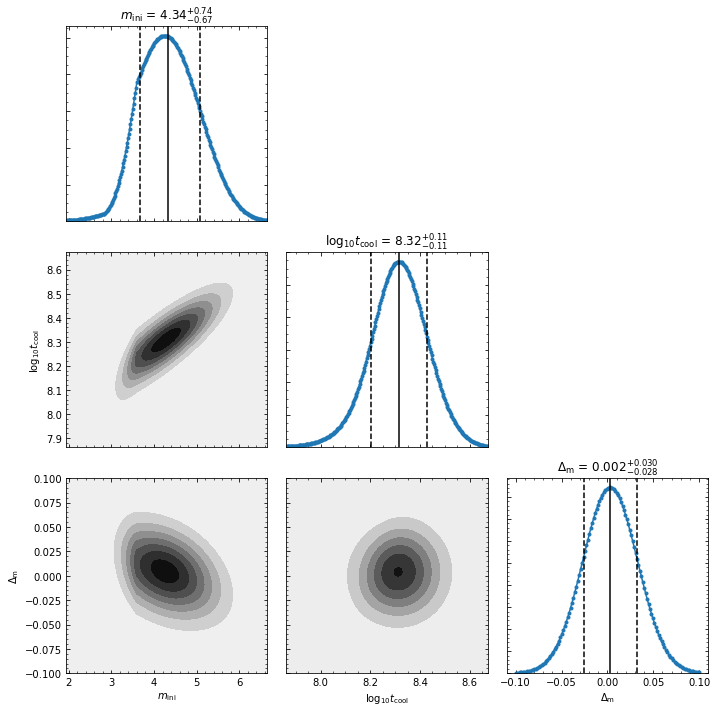

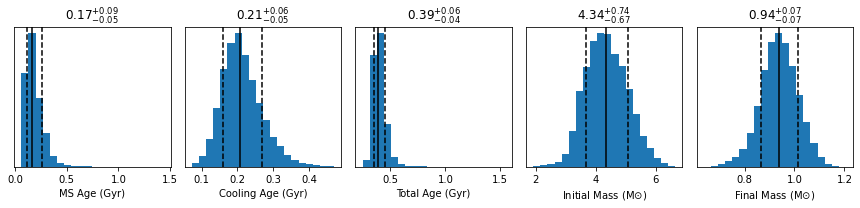

Time to run two white dwarfs: 40.97s


In [3]:
start_time = time.time()
WD = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST', 
                           high_perc = 84, low_perc = 16,
                           datatype='Gyr', 
                           save_plots=True, display_plots=True)
WD.calc_wd_age()
end_time = time.time()

print(f'Time to run two white dwarfs: {np.round(end_time-start_time,2)}s')

In [4]:
WD.results

ms_age_median,ms_age_err_low,ms_age_err_high,cooling_age_median,cooling_age_err_low,cooling_age_err_high,total_age_median,total_age_err_low,total_age_err_high,initial_mass_median,initial_mass_err_low,initial_mass_err_high,final_mass_median,final_mass_err_low,final_mass_err_high
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0085847493888629,0.4949423725309816,1.3708796486139487,0.10489350684638343,0.020770067343527557,0.02449791279629482,1.115186029262458,0.47917857338464587,1.3435661213941905,2.284166089965398,0.6887750865051905,0.605647058823529,0.68441705473667,0.045318261722474995,0.049727065362504375
0.16553841920328524,0.054311876463780356,0.09323537282855224,0.20709251206251164,0.048005777899160634,0.060524319827787526,0.38966921651013664,0.042682143096543,0.058184047664044725,4.3393771626297575,0.6686782006920411,0.7429757785467128,0.9387283504890608,0.07128756058087882,0.07383056622074491


The option `save_plots = True` will save several files to a folder called 'results', or any path we choose using the `path` parameter. Below we describe each of the files *wdwarfdate* method creates. In order of appearence (above):

1) "teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_gridplot.png": grid plot for the three independent variables: initial mass, cooling age and delta m.

2) "teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_distributions.png": Parameter distribution for the final mass and cooling age of the white dwarf, mass and main sequence age of the progenitor star and total age of the object.

**The fast-test method**

The fast-test method included in `wdwardate` generates a gaussian distribution for each pair of *teff* and *logg* using the uncertainties as standard deviation, and runs the full distribution through a chain of models to calculate the total age of the white dwarf, and the rest of the parameters described above. Below we show an example of the fast-test method.

Running teff:19250 logg:8.16


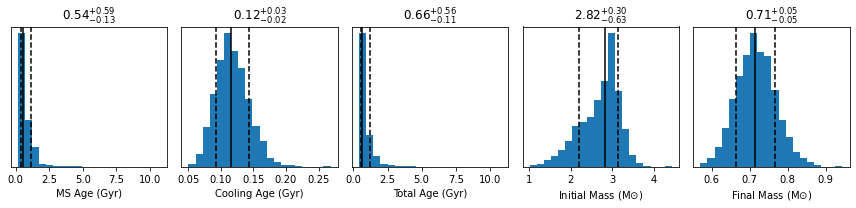

Running teff:20250 logg:8.526


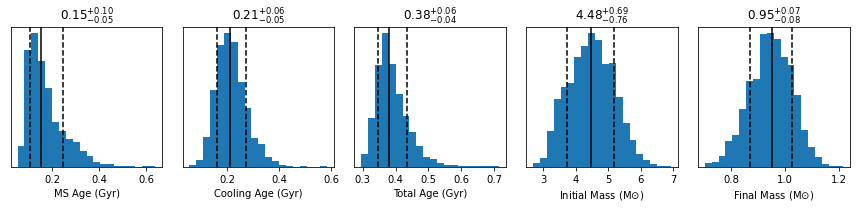

In [5]:
WD2 = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           method='fast_test',
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST',
                           high_perc = 84, low_perc = 16,
                           datatype='Gyr', return_distributions=True,
                           save_plots=False, display_plots=True)
WD2.calc_wd_age()

The parameters used in the `wdwarfdate.WhiteDwarf` for the fast-test method are similar to the Bayesian method. In this case we also set `return_distributions = True`, which will generate that one of the comlumns of the resulting Table of results will have the distributions for each parameter in the case of . For a detailed comparison of the two methods, go to the paper describing *wdwarfdate* (Kiman et al. in prep). Also, from the output plots described above, in this method we only get the distributions of the parameters.

In [6]:
WD2.results_fast_test

ms_age_median,ms_age_err_low,ms_age_err_high,cooling_age_median,cooling_age_err_low,cooling_age_err_high,total_age_median,total_age_err_low,total_age_err_high,initial_mass_median,initial_mass_err_low,initial_mass_err_high,final_mass_median,final_mass_err_low,final_mass_err_high,ms_age_dist,cooling_age_dist,total_age_dist,initial_mass_dist,final_mass_dist
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object
0.5449890150641449,0.13287865039175017,0.5868704939850006,0.11571859898585575,0.023090374021551563,0.02710833852148513,0.6620795876502494,0.10877715933620324,0.5581468413150625,2.820752549953921,0.628660653900158,0.30016429789394605,0.7146602039963137,0.05029285231201264,0.05295124655123751,[1.12974438 0.46235549 0.33118812 ... 0.30315244 0.41602609 1.35233035],[0.09528708 0.12230955 0.18047687 ... 0.16698275 0.14583674 0.08696624],[1.22503146 0.58466504 0.51166498 ... 0.47013518 0.56186283 1.43929659],[2.1933516 2.99287636 3.35776755 ... 3.46489022 3.11106523 1.98412644],[0.66446813 0.74366788 0.81190253 ... 0.83193447 0.7657692 0.64773012]
0.15242746710347288,0.045980878368909114,0.09630450304577276,0.20973577496656318,0.0507277543909484,0.06153344846189804,0.3802278034112752,0.03501610493789081,0.055321797327267386,4.479076400660727,0.7570869402812255,0.6948831528884707,0.9502611748706977,0.08100830261009107,0.07435249735906635,[0.25352724 0.12204163 0.08092531 ... 0.24108948 0.14602959 0.23467511],[0.1374518 0.23143196 0.30562059 ... 0.12741409 0.2353348 0.16256821],[0.39097904 0.35347359 0.38654591 ... 0.36850357 0.38136439 0.39724332],[3.69646729 4.89155363 5.81027686 ... 3.76424812 4.55449404 3.80144745],[0.866522 0.99439624 1.09269962 ... 0.87377455 0.95833086 0.87775488]
